Name: Dawson Dinh

In [41]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from IPython import display
import pandas as pd
import tensorflow as tf
import keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout


In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
train_path = "/content/drive/MyDrive/mlcourse/final/fashion-mnist_train.csv"
test_path = "/content/drive/MyDrive/mlcourse/final/fashion-mnist_test.csv"

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
#This cell is to split the training data and testing data into X and Y arrays
train_data = np.array(train_df, dtype='float32')
test_data = np.array(test_df, dtype='float32')

x_train = train_data[:, 1:] / 255
y_train = keras.utils.to_categorical(train_data[:, 0], num_classes=10)
x_test = test_data[:, 1:] / 255
y_test = keras.utils.to_categorical(test_data[:, 0], num_classes=10)

In [45]:
#The dataset did not include a validation set so in this cell
#I split the training data into train and validate arrays
x_train, x_validate, y_train, y_validate = train_test_split(
    x_train, y_train, test_size=0.2, random_state=12345,
)

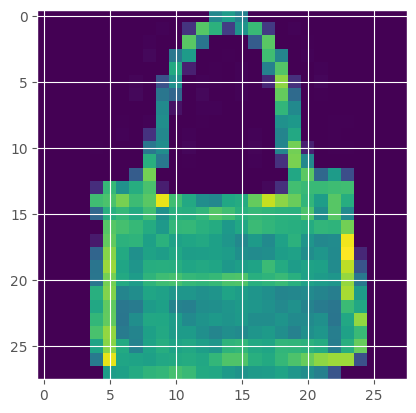

In [46]:
#just to see what an image looks like 
image = x_train[20, :].reshape((28, 28))

plt.imshow(image)
plt.show()

In [47]:
#This cell is to prepare the image data for training the CNN.
#This is done by reshaping the input data to an appropriate shape 
image_rows = 28
image_cols = 28
batch_size = 512
image_size = (image_rows, image_cols, 1)

x_train = x_train.reshape(x_train.shape[0], *image_size)
x_test = x_test.reshape(x_test.shape[0], *image_size)
x_validate = x_validate.reshape(x_validate.shape[0], *image_size)

print('x_train shape: {}'.format(x_train.shape))
print('x_test shape: {}'.format(x_test.shape))
print('x_validate shape: {}'.format(x_validate.shape))

x_train shape: (48000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
x_validate shape: (12000, 28, 28, 1)


**CNN MODEL**

In [48]:
#Our CNN model 
#You can uncomment some of the layers to see the difference in performance
#Or tune hyperparamters
model = Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=image_size),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.2),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.2),
    Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

#Compiles the CNN model by specifying the loss function optimizer
#YOu can change the optimizer but I found Adam to be the best
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [49]:

history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=30,
    verbose=1,
    validation_data=(x_validate, y_validate),
)

score = model.evaluate(x_test, y_test, verbose=0)
#evaluate the performance of the model after training
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {:.4f}'.format(score[0]))
print('Test accuracy: {:.4f}'.format(score[1]))

Epoch 1/30
94/94 [==============================] - 68s 712ms/step - loss: 0.9724 - accuracy: 0.6395 - val_loss: 0.5662 - val_accuracy: 0.7848
Epoch 2/30
94/94 [==============================] - 61s 652ms/step - loss: 0.5740 - accuracy: 0.7846 - val_loss: 0.4655 - val_accuracy: 0.8258
Epoch 3/30
94/94 [==============================] - 61s 654ms/step - loss: 0.4903 - accuracy: 0.8181 - val_loss: 0.4068 - val_accuracy: 0.8498
Epoch 4/30
94/94 [==============================] - 63s 675ms/step - loss: 0.4404 - accuracy: 0.8380 - val_loss: 0.3763 - val_accuracy: 0.8591
Epoch 5/30
94/94 [==============================] - 61s 644ms/step - loss: 0.4068 - accuracy: 0.8497 - val_loss: 0.3548 - val_accuracy: 0.8696
Epoch 6/30
94/94 [==============================] - 63s 670ms/step - loss: 0.3834 - accuracy: 0.8594 - val_loss: 0.3258 - val_accuracy: 0.8817
Epoch 7/30
94/94 [==============================] - 62s 651ms/step - loss: 0.3612 - accuracy: 0.8670 - val_loss: 0.3140 - val_accuracy: 0.8862

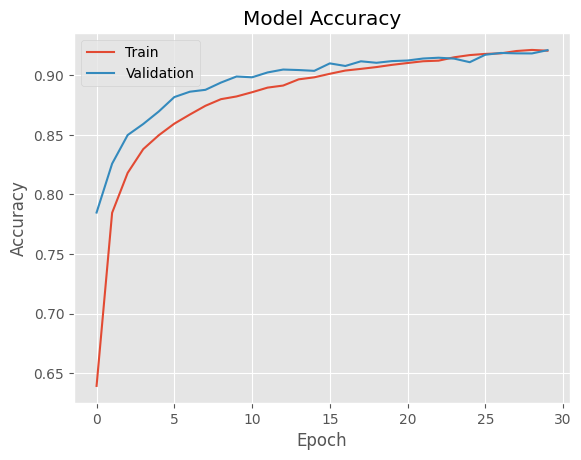

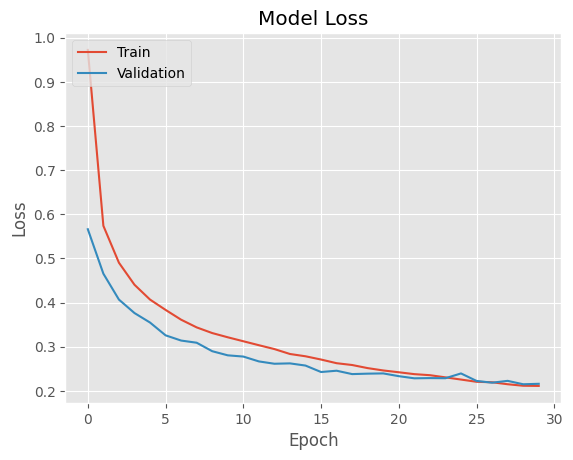

In [50]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [51]:
def plot_curves(history):
    fig, axs = plt.subplots(2, 1, figsize=(10, 10))
    axs[0].plot(history.history['accuracy'], label='Training Accuracy')
    axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
    axs[0].set_title('Training and Validation Accuracy')
    axs[0].legend()

    axs[1].plot(history.history['loss'], label='Training Loss')
    axs[1].plot(history.history['val_loss'], label='Validation Loss')
    axs[1].set_title('Training and Validation Loss')
    axs[1].legend()

    plt.show()

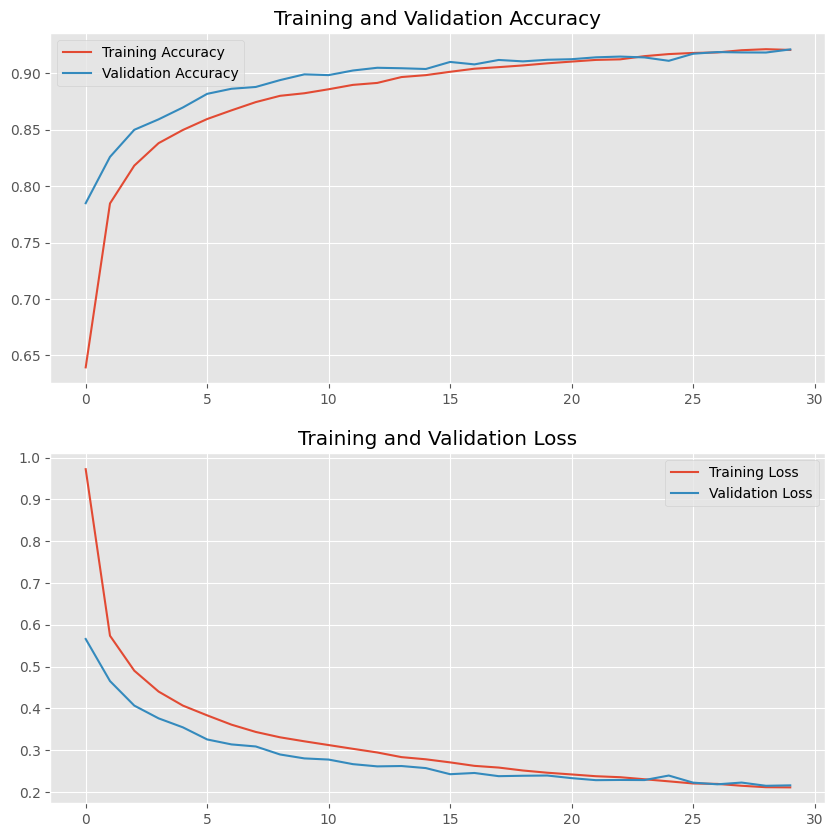

In [52]:
plot_curves(history)